In [2]:
import os
import warnings
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency, kruskal, pearsonr, shapiro, levene, mannwhitneyu, spearmanr
from termcolor import colored

warnings.filterwarnings("ignore")

# Predicting the Beats-per-Minute of Songs
#### https://www.kaggle.com/competitions/playground-series-s5e9/overview

- Pour le plan, bien avoir en tête que l'EDA sert majoritairement à comprendre les données, toutes les modification dessus servent uniquement pour mieux comprendre les relation entre features et target (si présence), le nettoyage (pour des erreurs, ou probleme de formatage de colonne) peuvent être directement validé dessus.

- Tout le reste , ce qui est PCA, tSNE, regplot etc ne servent qu'a mieux identifier les relations et ne doivent pas être validé dès l'EDA. Une fois que tout à été fait pendant l'EDA, on refera dans la modélisation en séparant bien le train, test et validation set en utilisant les outil adaptés à la transformation


# Plan :
#  Notebook EDA
## 1. Connaissance des données
- features :
	- numériques (continues/discretes)
	- qualitatives (ordinale/ nominale) 
		= > traitement : continue Vs discrètes & qualitatives
- Présence target ? 	
- Imputation : Données manquantes ? 
	
## 2. DataVisualisation :
- Analyses des features
	- Analyse univariée pour comprendre chaque feature indépendamment les unes des autres
        - Traitement des données numériques continues :
            - boxplot, histplot
        - Analyse bivariée : relation entre 2 features
		- Continue/continue : heatmap, scatterplot,lineplot, regplot, pairplot, regplot
			- pour scatterplot, si trop de données : on peut faire un KDEplot pour afficher la densité des points
			- lineplot : on peut faire un heatmap à la place ou utiliser moins de données via un sous échantillon
			sous échantillon : il faut s'assurer de garder les bons quota (stratify = [x1,x2,..]) + verification des stats descriptives
				qui doivent être proche (df_resampled.describe() ~ df.describe() en terme de std,mean, med
			- regplot : permet une regression linéaire simple entre 2 features continues (trace un scatterplot + regression)


	- Analyse multivariée : ici on peut avoir 2 continues 1 discrètes, 2 continues 2 discrètes/qualitatives, etc.
		- 2 continues + 1 ou 2 qual/discrete : lmplot
		- 2 continues + 1 discrete (ou qual) : scatterplot + hue		

## 3. Tests statistiques : 
- En complément de la datavisualisation afin de vérifier la relation entre 2 variables (généralement target/feature)
	- Cas 1 : 2 features continues 
		- Loi de Pearson si les données suivent une loi normale (heatmap) : si -1 anticorrélée, 1 corrélée, 0 alors p-e une relation non linéaire
		- Loi Spearman/Kendall  : si les 2 ou 1 des 2 features ne suivent pas une loi normale : si -1/1 alors forte (anti)corrélation, 0 & pval élevée : pas relation
	- Vérifier si la feature suit une loi normale : Shapiro Wilk
		- Pour vérifier la dépendance, on pose H0 : variables indépendantes. Si pval<risque seuil (alpha), on rejette H0 pour la réciproque H1 avec un risque inférieur au seuil posé.
	On conclue à la dépendance des variables
	
***Remarque*** : Ce n'est pas à l'issue de ces tests statistique que nous déciderons de la suppression ou non de feature :


In [3]:
path = "D:/Etude_Data_science/Kaggle_competition/17_Predicting_the_Beats-per-Minute_of_Songs/dataset//"

In [4]:
train = pd.read_csv(path+"train.csv")
df = train.copy()

In [5]:
print(df.shape)
df.head()

(524164, 11)


id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.31989  
3  0.487467       147.91212  
4  0.947333        89.58511

In [6]:
df.dtypes

id                             int64
RhythmScore                  float64
AudioLoudness                float64
VocalContent                 float64
AcousticQuality              float64
InstrumentalScore            float64
LivePerformanceLikelihood    float64
MoodScore                    float64
TrackDurationMs              float64
Energy                       float64
BeatsPerMinute               float64
dtype: object

In [7]:
df.isnull().mean()[df.isnull().mean()>0]

Series([], dtype: float64)

#### Features : 
- **RhythmScore** : Note rythmique
- **AudioLoudness** : Volume sonore
- **VocalContent** : Contenu vocal
- **AcousticQuality** : Qualité acoustique
- **InstrumentalScore** : Note instrumentale
- **LivePerformanceLikelihood** : Probabilité d'interprétation en direct
- **MoodScore** : Note d'ambiance
- **TrackDurationMs** : Durée du morceau (ms),
- **Energy** : Énergie

* **BeatsPerMinute** : Battements par minute  = **target**

- Nous sommes dans un problème de régression
- Pas de données manquantes
- Toutes les features de type float : **variables continues**

##  2. DataVisualisation :
Nous n'avons que des variables de type quantitatives continues (target incluse), cela restreint le nombre de visualisation possible à faire

Pour l'analyse univariée nous allons faire des boxplot et des histplot

### Analyse univariée : 

In [8]:
var_cont = [i for i in df if i != "id"]

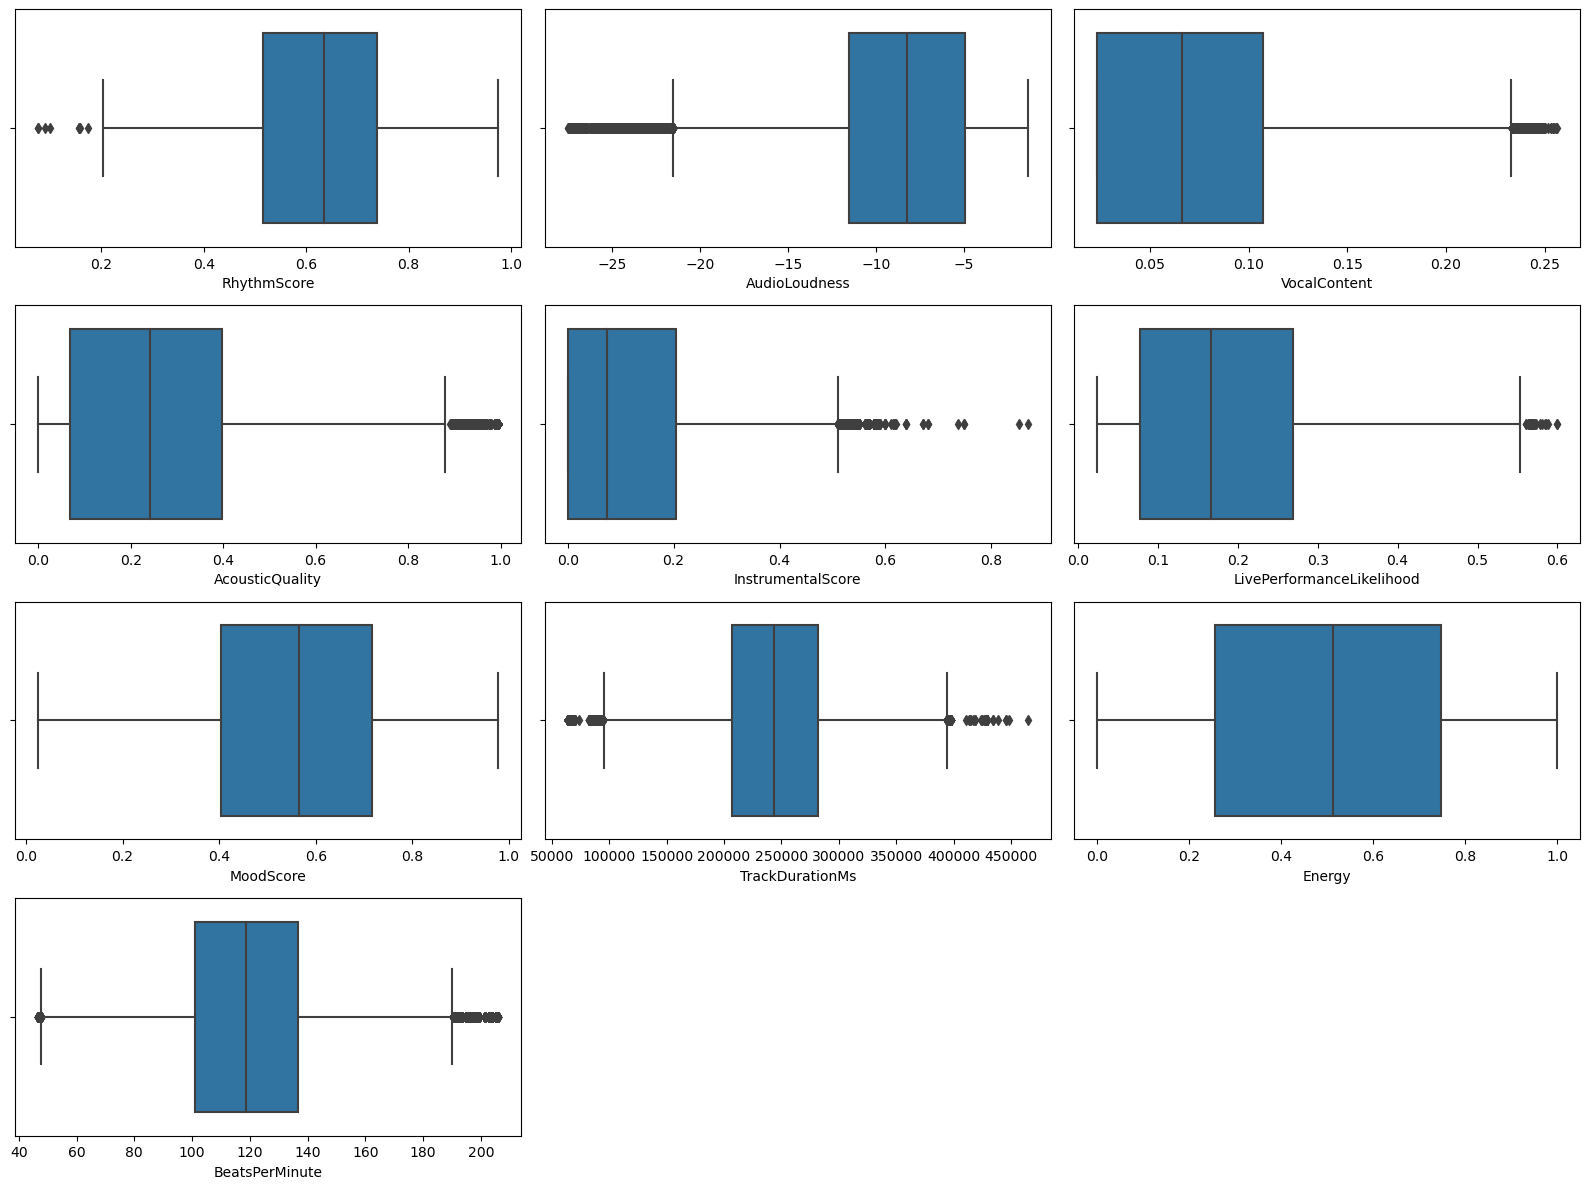

In [8]:
plt.figure(figsize=(16,12))
for i,k in enumerate(var_cont,1):
    plt.subplot(4,3,i)
    sns.boxplot(data = df, x =k)
plt.tight_layout()    
plt.show()

### Observation : 
- Quelques features ne possède pas d'outliers comme : RythmScore,MoodScore ou Energy.
- Toutes les autres features ont des outliersb


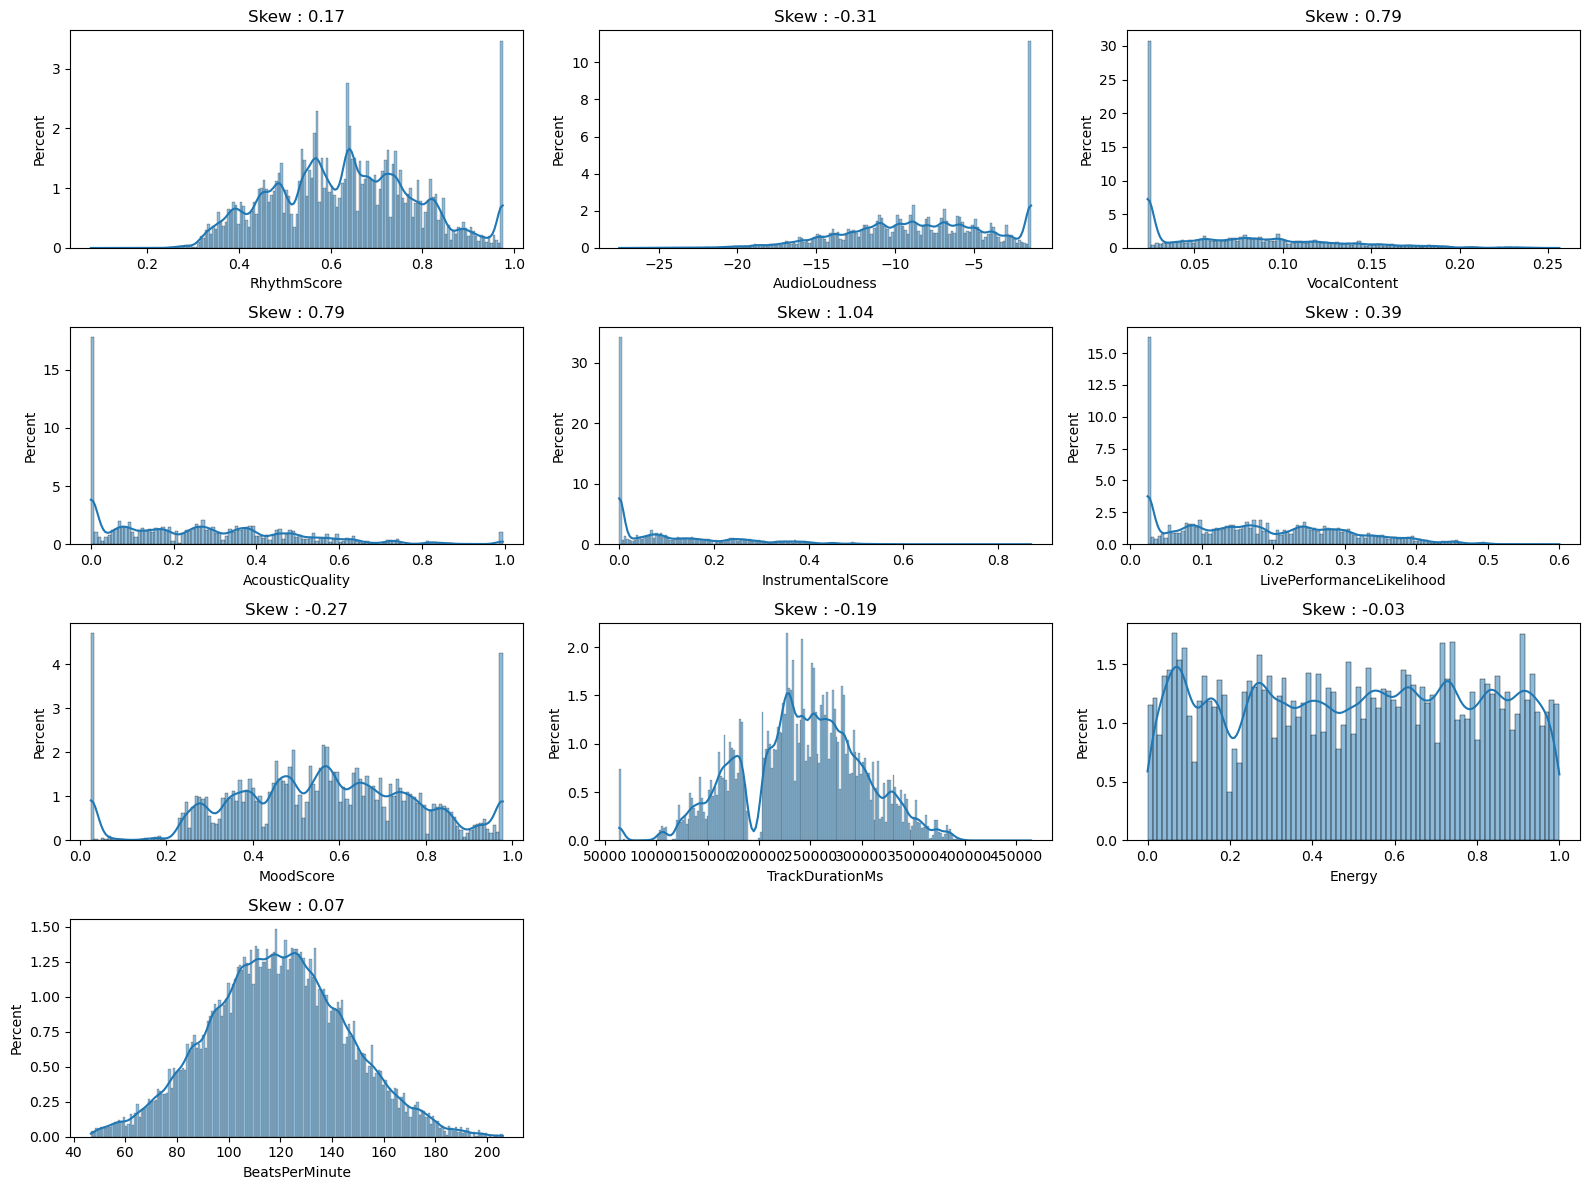

In [30]:
plt.figure(figsize=(16,12))
for i,k in enumerate(var_cont,1):
    plt.subplot(4,3,i)
    ax = sns.histplot(data = df, x =k,  kde=True,  stat="percent")
    ax.set_title(f"Skew : {round(df[k].skew(),2)}")
#     print("Skew : ", round(df[k].skew(),2))
plt.tight_layout()
plt.show()

In [10]:
def shapiro_test(list_col):
    """
    Cette fonction teste si list_col est une liste, si ce n'est pas le cas,
    elle convertie le texte en une liste avant de faire un test shapiro pour vérifier
    si la feature suit une loi normale ou non
    """
    if type(list_col) != list:
        list_col = [list_col]

    accepted,rejected = [], []

    for col in df[list_col]:
        stat, p_value = shapiro(df[col])  
        alpha = 0.05
        if p_value > alpha: 
            result = colored('Accepter', 'green')  
            accepted.append(col)
        else:
            result = colored('Rejet','red')        
            rejected.append(col)

        print(f'{col:-<50}\t Hypothèse: {result}')
    return accepted,rejected
shapiro_test(var_cont)

RhythmScore---------------------------------------	 Hypothèse: Rejet
AudioLoudness-------------------------------------	 Hypothèse: Rejet
VocalContent--------------------------------------	 Hypothèse: Rejet
AcousticQuality-----------------------------------	 Hypothèse: Rejet
InstrumentalScore---------------------------------	 Hypothèse: Rejet
LivePerformanceLikelihood-------------------------	 Hypothèse: Rejet
MoodScore-----------------------------------------	 Hypothèse: Rejet
TrackDurationMs-----------------------------------	 Hypothèse: Rejet
Energy--------------------------------------------	 Hypothèse: Rejet
BeatsPerMinute------------------------------------	 Hypothèse: Rejet


([],
 ['RhythmScore',
  'AudioLoudness',
  'VocalContent',
  'AcousticQuality',
  'InstrumentalScore',
  'LivePerformanceLikelihood',
  'MoodScore',
  'TrackDurationMs',
  'Energy',
  'BeatsPerMinute'])

### Observation : 
#### Visuellement :
Si la skew est > |0.5| on dira que la courbe est asymétrique, sinon on la considère comme symétrique
- Ici, 7 / 10 features ont une |skew| <0.5 soit 7 features avec une distribution symétriques 
- 3 features asymétriques : VocalContent, AucousticQuality et InstrumentalScore
#### Test Shapiro :
- L'hypothèse est rejeté pour l'ensemble des features, pourtant, on vient de voir que visuellement, on pourrait considérer certaine feature comme la target symétrique. Ce rejet est surement provoqué par la quantité énorme de données qui devient très sensible malgrès un faible écart. Donc on va plutôt se baser sur ce qu'on a visuellement observé plutôt que le test

#### Conclusion : 
1 feature suit une loi normale (unimodale, distribution gaussienne) : BeatsPerMinute

Ces informations sont interessantes en cas d'imputation de données pour remplacer soit par la médiane (pour distribution asymétrique ou pour variables discrètes), la moyenne (distribution symétrique) ou le mode (pour variable nominale/catégorielle)

In [22]:
#feature suivant une loi normale : 
var_cont_non_norm = [i for i in df if i not in (target.name,"id")]
#feature qui ne suivent pas une loi normale : 
var_cont_norm = target.name

### Analyse bivariée :  target Vs  continues


In [11]:
target = df.BeatsPerMinute

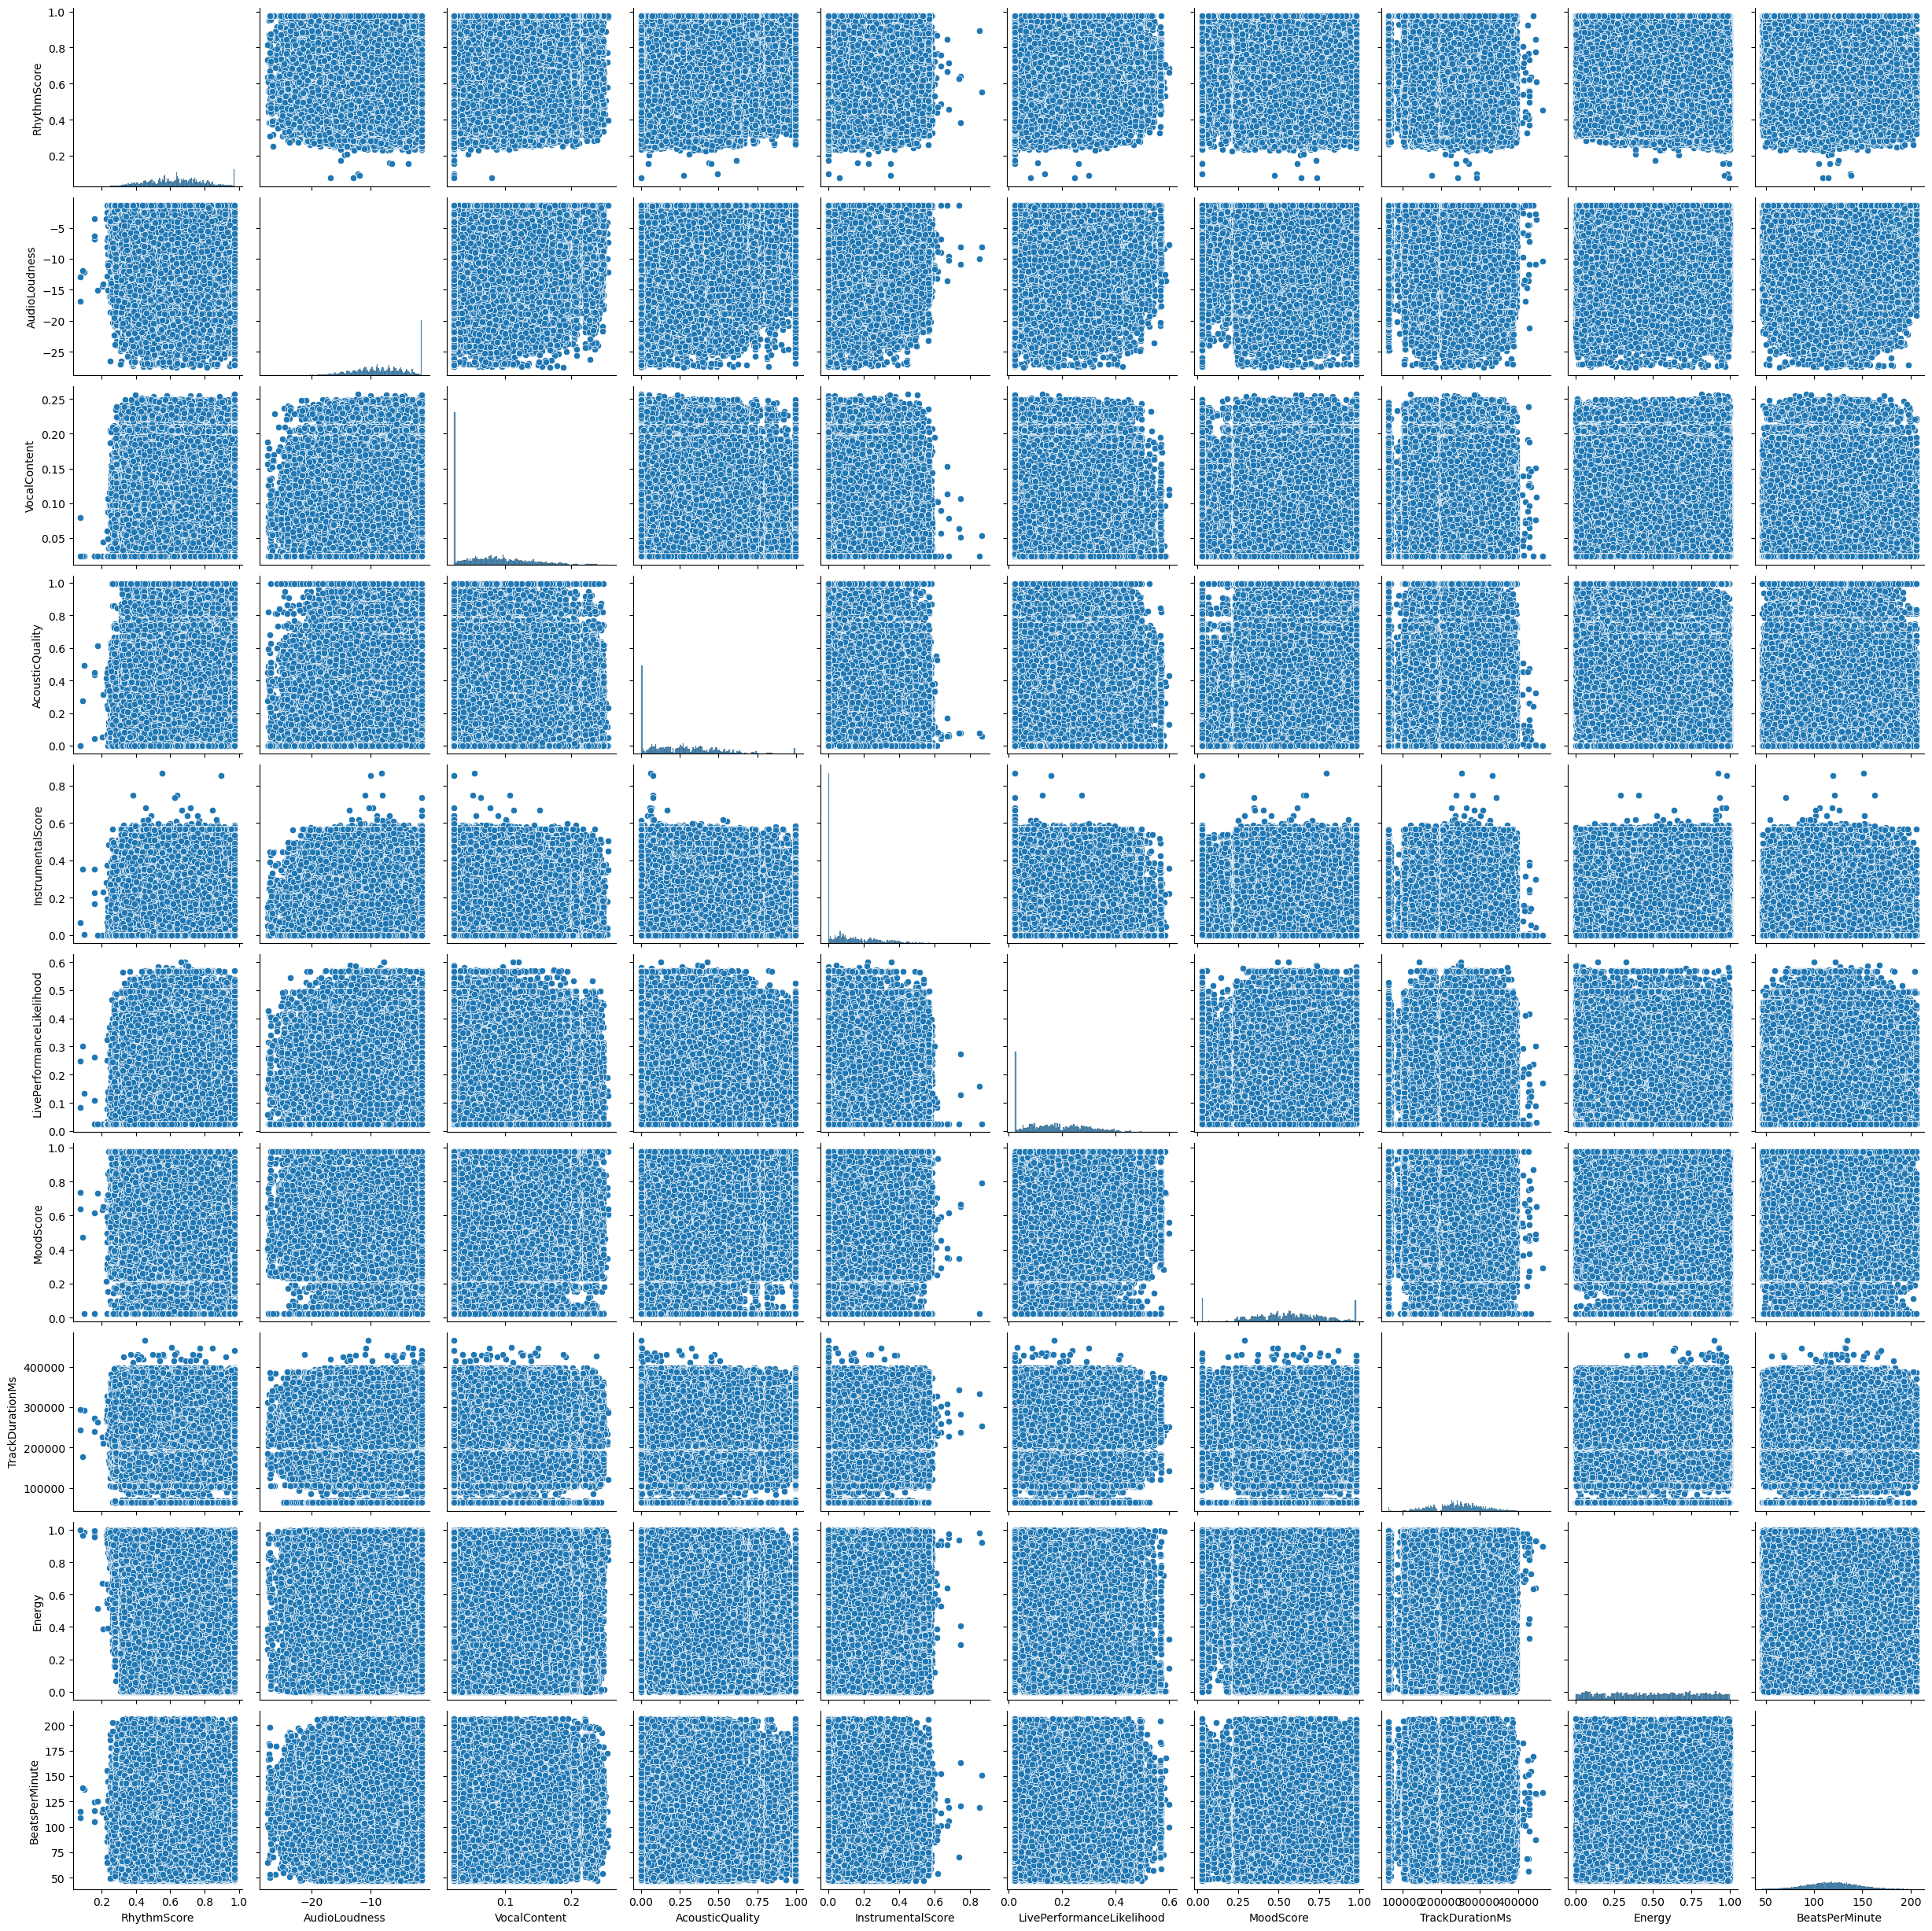

In [42]:
sns.pairplot(df[var_cont])
plt.show()

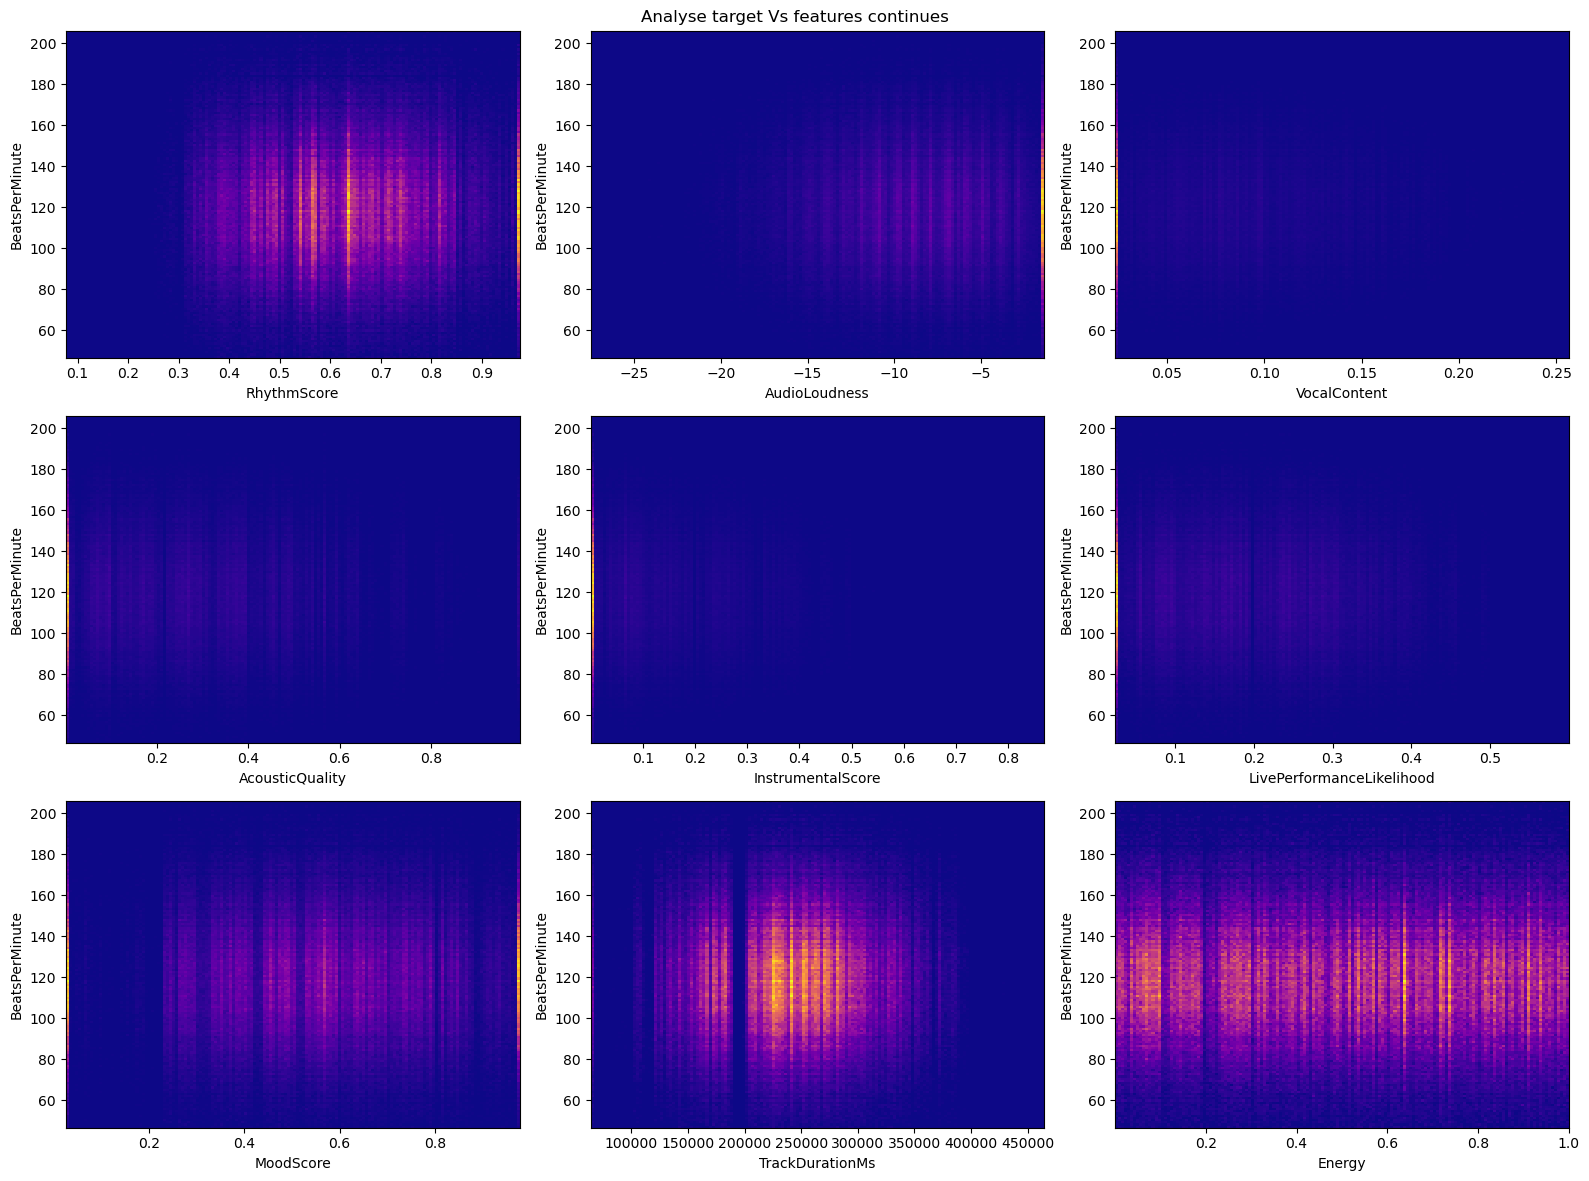

In [67]:
plt.figure(figsize=(16,12))
plt.suptitle("Analyse target Vs features continues")
for i,k in enumerate(var_cont,1):
    if k!=target.name :
        plt.subplot(3,3,i)
        plt.hist2d(x= k, y = "BeatsPerMinute",data=df, 
               bins=150, cmap="plasma")
        plt.xlabel(k)
        plt.ylabel(target.name)
plt.tight_layout()
plt.show()

### Observations : 
- Pour des features comme Energy, TrackDurationMs ou enore RythmScore, on peut apercevoir différentes zones chaudes (en jaune) qui nous indique des combinaisons de valeurs fréquentes
- **RythmScores** :
    - cela veut dire que certains RhythmScore reviennent souvent, pas de manières uniformes mais des valeurs privilégiées. Le **“cœur”** le plus dense est vers RhythmScore ~0.6 et BPM entre 100 et 140 → c’est là que se concentrent la majorité des données.

- Sur d'autres variables, il n'y a pas forcément de zone chaude, autrement dit, le jeu de données ne privilégie pas une combinaison particulière. C’est typiquement le cas quand les variables sont assez indépendantes

### Heatmap : 

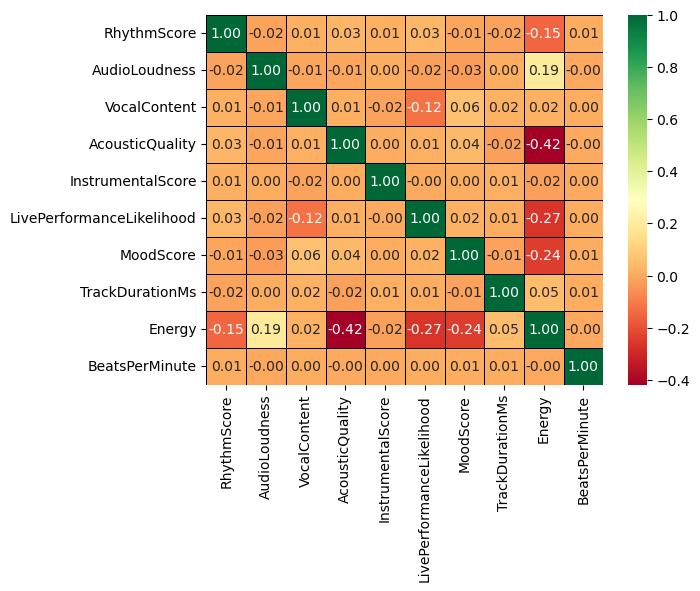

In [12]:
corr_matrix = df.drop("id", axis=1).corr()
sns.heatmap(corr_matrix, fmt =".2f", annot=True, cmap="RdYlGn", linecolor="black",linewidths=.4)
plt.show()

#### Observation ; 
- La heatmap confirme ce que nous avons vu précédemment : pas de relation linéaire détectée entre la target et les différentes features
On peut imaginer une relation non linéaire entre la target et les features

## 3. Test stastiques : 

Nous allons tester les différentes features avec la target. Dans la partie visualisation nous avons supposé que seule la target suit une loi normal et non les features. Par conséquent nous allons utiliser un test **non paramétrique** : Test de **Spearman** 


In [38]:
def spearman_test(feature, target, dataframe):
    """
    Fonction pour effectuer le test de corrélation de Spearman entre une feature et une target.
    Paramètres :
        - feature : Liste de features ou une feature unique
        - target : Nom de la target
        - dataframe : DataFrame contenant les données
    
    Retourne :
        - var_a_conserver : Liste des features ayant une corrélation significative avec la target 
        - var_a_suppr: Liste des features n'ayant pas une corrélation significative avec la target
    """
    var_a_conserver = []
    var_a_suppr = []

# Test de corrélation de Spearman
    for feat in feature:
        corr, p_value = spearmanr(dataframe[feat], dataframe[target])

# Afficher les résultats
#         print (f"Feature: {feat}")
#         print (f"Corrélation avec {target} : {corr}")
#         print (f"P-value : {p_value}")

# Interpréter les résultats
        alpha = 0.05 # Niveau de signification
        if p_value < alpha:
            var_a_conserver.append(feat)
        else:
            var_a_suppr.append(feat)
#         print()
    print("Variables montrant une dépendance monotone significative avec la cible (candidates intéressantes) :\n",
          colored(var_a_conserver,'green',attrs=['bold'])) 
    print("Variables ne montrant pas de dépendance monotone significative" 
          " (a re-tester avec d’autres méthodes, ou à surveiller dans la feature importance) :\n ", 
          colored(var_a_suppr,'red',attrs=['bold']))
    return var_a_conserver, var_a_suppr

In [40]:
var_dep, var_non_dep = spearman_test(feature=var_cont_non_norm, target=var_cont_norm, dataframe=df)

Variables montrant une dépendance monotone significative avec la cible (candidates intéressantes) :
 ['RhythmScore', 'VocalContent', 'LivePerformanceLikelihood', 'MoodScore', 'TrackDurationMs', 'Energy']
Variables ne montrant pas de dépendance monotone significative (a re-tester avec d’autres méthodes, ou à surveiller dans la feature importance) :
  ['AudioLoudness', 'AcousticQuality', 'InstrumentalScore']


## Conclusion EDA : 
- L'EDA nous montre que nous avons certainement à faire à un problème de régression avec une relation features/target **non linéaire**
- Cela nous oriente sur le choix du modèle : Des modèles linéaires seront certainement très peu pertinent sur la prédiction de la target
- L'utilisation de modèle non linéaire ou de modèle ensembliste (Randomforest, XGBoost, etc.) seront certainement plus efficace pour prédire les données (Remarque : La quantité de données peut avoir un impacte significatif sur la durée d'entrainement des modèles non linéaires)